# Two Ways to use R with Studio Lab


[![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/aws/studio-lab-examples/blob/main/custom-environments/R/1.InstallR.ipynb)

1. Install the R kernel so an entire notebook can start with that.
2. Use the `rpy2` package to run R jointly with Python in the same notebook.

This notebook will demonstrate both approaches and also show how to use Python and R namespaces together. Some basic R code is also provided. 

## 1. Installing the R kernel

Installing this will enable notebook to use an R kernel. Please run the following command or use `R.yml` to build the environment. 

In [15]:
%conda install -c r r-irkernel -y

After executing this, you will see the R kernel appear in the Launcher page. 

You can open a new notebook with the R kernel and then use R. See the notebook `SampleR_NB.ipynb` for some code examples, also replicated below with the second approach to using R in Studio Lab. 

Or, you can run R in a Python notebook with the following approach. 

## 2. Using the `rpy2` package

The benefit of this approach is that you can use Python and R in the same notebook interoperably. 

In [16]:
%conda install -c r rpy2 -y

Now you can load up R with the following magic command: 

In [17]:
%pip install numpy
%pip install pandas
%load_ext rpy2.ipython

In [ ]:
# restart your kernel manually to use the new packages

In [18]:
%reload_ext rpy2.ipython

Now, try R to make sure it works. In order to designate a code block as R, use the magic command `%%R` at the top of the code block as follows: 

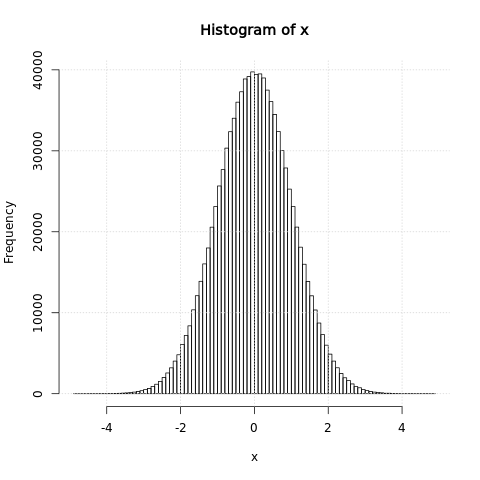

In [3]:
%%R
x = rnorm(1000000) # generate a million random normal variates
hist(x,100) # plot a histogram with 100 bins to make sure graphics are also working
grid()

## Sending data from the R namespace to the Python namespace

You can even send data from R to Python using the following approach.

The following blocks of code are in Python. 

In [4]:
x = %Rget x

In [5]:
%%capture
# Install some Python libraries
!pip install matplotlib
%pylab inline
import pandas as pd

0.0011452776011201908


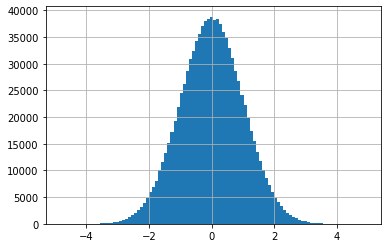

In [6]:
print(mean(x))
hist(x,100)
grid()

In [7]:
y = rand(10000) # These are uniform random numbers

Send y from the Python namespace to R

In [8]:
%Rpush y

Now use R again: 

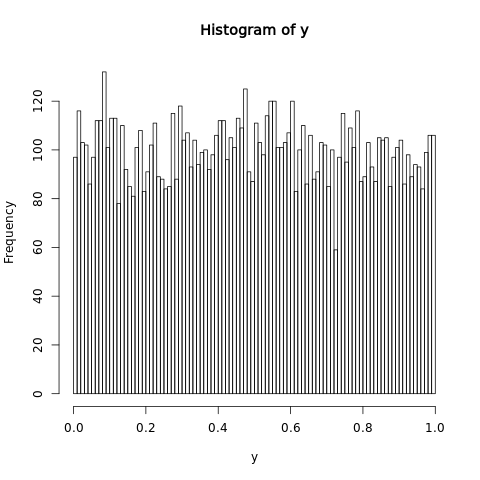

In [9]:
%%R
hist(y,100)

## Now back to doing everything in R

Let's install some libraries. 

Remember to add the magic function `%%R` at the top of each code block. 

In [19]:
%%R
# this line will prompt you to pick a CRAN mirror. please type in 77 in the selection bar below and hit return
install.packages(c("quantmod", "magrittr"))

In [20]:
%%R
library(quantmod)
getSymbols("^GSPC")

In [12]:
%%R
head(GSPC)

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2007-01-03   1418.03   1429.42  1407.86    1416.60  3429160000       1416.60
2007-01-04   1416.60   1421.84  1408.43    1418.34  3004460000       1418.34
2007-01-05   1418.34   1418.34  1405.75    1409.71  2919400000       1409.71
2007-01-08   1409.26   1414.98  1403.97    1412.84  2763340000       1412.84
2007-01-09   1412.84   1415.61  1405.42    1412.11  3038380000       1412.11
2007-01-10   1408.70   1415.99  1405.32    1414.85  2764660000       1414.85


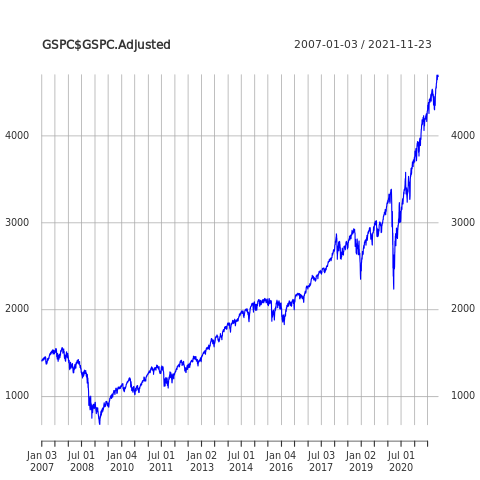

In [13]:
%%R
plot(GSPC$GSPC.Adjusted, type='l', col='blue', lwd=1.5)

Spectacular growth in the stock price!

We can invoke the same functionality in R using pipes with the `magrittr` package. Can you see why the package is so named? 

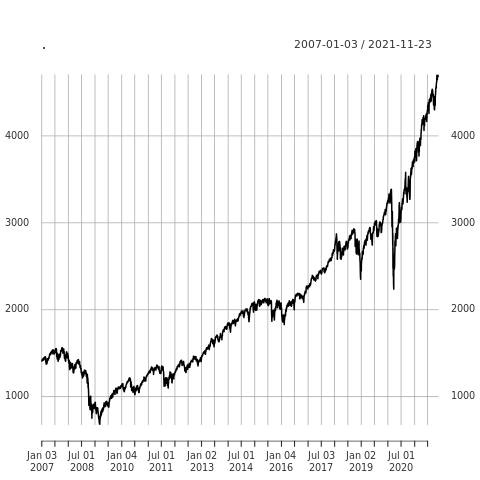

In [14]:
%%R
library(magrittr)
GSPC$GSPC.Adjusted %>% plot()

---
# Using R in SageMaker Studio
Did you know you can bring your own RStudio License to SageMaker Studio on AWS? Check out the announcement blog post here.
https://aws.amazon.com/blogs/machine-learning/get-started-with-rstudio-on-amazon-sagemaker/ 